In [1]:
import sys
import os

import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

In [14]:
housing = pd.read_csv("housing.csv")

housing = housing.iloc[:5000,:] # only use the first 5000 observations

### Attribute Combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


## Training and testing sets

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


## Preprocessing

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))


from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)



## Training X and y variables

In [5]:
train_X = train_set.drop("median_house_value", axis=1)
train_y = train_set["median_house_value"].copy()

train_X_prepared = preprocessing.fit_transform(train_X)

## Testing X and y variables

In [6]:
test_X = test_set.drop("median_house_value", axis=1)
test_y = test_set["median_house_value"].copy()

# transform X in testing set
test_X_prepared = preprocessing.transform(test_X)


# Linear Regression Model

**Task 1:** 

1. Fit a Linear Regression model using `train_X_prepared` as predictor, and `train_y` as response.
2. Then, calculate the testing RMSE using `test_X_prepared` as predictor, and `test_y` as response.

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_X_prepared, train_y)
LinearRegression()


LinearRegression()

MSE

In [18]:
from sklearn.metrics import mean_squared_error
train_lfitted = lin_reg.predict(train_X_prepared)
train_mse = mean_squared_error(train_y, train_lfitted)
train_mse

4776283562.9976425

RMES

In [13]:
train_rmse = np.sqrt(train_mse)
print("Train RMSE:", train_rmse)

Train RMSE: 69110.6617172607


# Ridge

**Task 2:**
1. Fit a Ridge Regression model with tuning parameter $\alpha=10$ using `train_X_prepared` as predictor, and `train_y` as response. Then, calculate the testing RMSE using `test_X_prepared` as predictor, and `test_y` as response.
2. Use grid search to choose the best $\alpha$ value (You may need multiple grid searches). Then use the Ridge model with the best alpha value to calculate the testing RMSE.

In [21]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=10, solver="cholesky")
ridge_reg.fit(train_X_prepared, train_y)
ridge_reg.intercept_, ridge_reg.coef_

(208266.45989755707,
 array([-51021.0584814 , -51342.28114018,  12529.81108502,  10373.05663217,
         -6000.43262837, -50369.76902366,  50295.04765218,  75466.48197152,
          8479.31032996,  16562.39342402,   2421.95039148,   8026.69436141,
        -28741.94149237,   3863.74040755,  16851.50672338]))

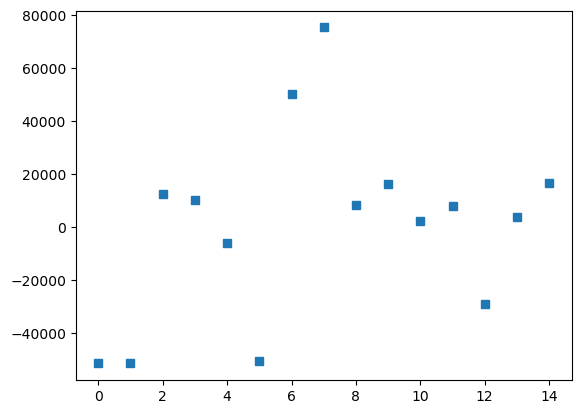

In [22]:
plt.plot(ridge_reg.coef_, 's', label="Ridge alpha=10")

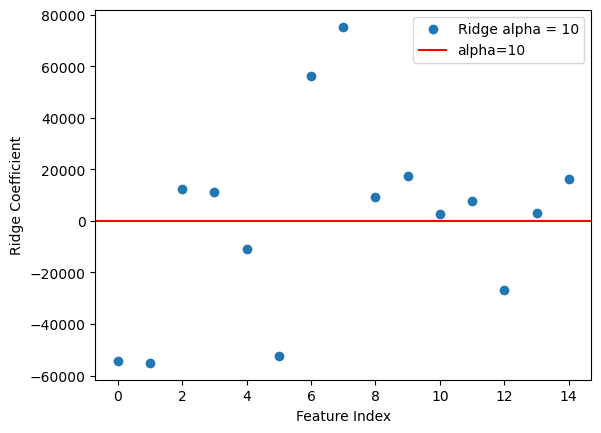

In [25]:
plt.Figure(figsize=(10, 6))
plt.plot(lin_reg.coef_, 'o', label="Ridge alpha = 10")
plt.axhline (y=10, color='r', linestyle='-', label="alpha=10")
plt.xlabel('Feature Index')
plt.ylabel('Ridge Coefficient')
plt.legend()
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

rmse_values = []
alpha_values = [0, 0.1, 1, 10, 100, 1000]
for alpha in alpha_values:
    ridge_reg = Ridge(alpha=alpha, solver="cholesky")
    ridge_reg.fit(train_X_prepared, train_y)

    test_predict = ridge_reg.predict(test_X_prepared)

    test_mse = mean_squared_error(test_y, test_predict)

    test_rmse = np.sqrt(test_mse)
    print("Test RMSE for alpha = ", alpha, ":", test_rmse)
    rmse_values.append(test_rmse)

Test RMSE for alpha =  0 : 72384.18256257371
Test RMSE for alpha =  0.1 : 72130.19582574746
Test RMSE for alpha =  1 : 72135.83712086234
Test RMSE for alpha =  10 : 72195.34017238923
Test RMSE for alpha =  100 : 72734.07761290054
Test RMSE for alpha =  1000 : 77502.51067366503


C:\Users\Mr.Grumpy\AppData\Local\Temp\ipykernel_23084\1147505602.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(alpha_values, rmse_values, 'o-', linestyle='-', color='b')


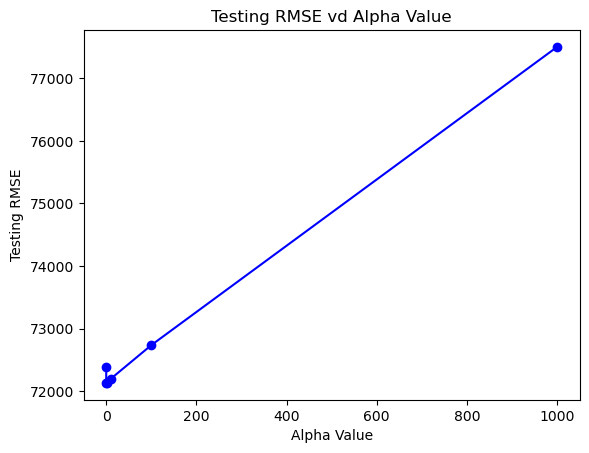

In [27]:
plt.Figure(figsize=(10, 6))
plt.plot(alpha_values, rmse_values, 'o-', linestyle='-', color='b')
plt.title('Testing RMSE vd Alpha Value')
plt.xlabel('Alpha Value')
plt.ylabel('Testing RMSE')
plt.show()

#### The alpha 0.1 is the best one because lowest value at 72131

# LASSO

**Task 3:**
1. Fit a LASSO Regression model with tuning parameter $\alpha=1000$ using `train_X_prepared` as predictor, and `train_y` as response. Then, calculate the testing RMSE. Can the LASSO model help select variables?
2. Use grid search to choose the best $\alpha$ value (You may need multiple grid searches). Use the LASSO model with the best $alpha$ value to calculate the testing RMSE.

In [28]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1000)
lasso_reg.fit(train_X_prepared, train_y)

Lasso(alpha=1000)

In [29]:
test_LS_predict = lasso_reg.predict(test_X_prepared)

test_LSrmse= np.sqrt(mean_squared_error(test_y, test_LS_predict))
print("Test RMSE for Lasso alpha = 1000:", test_LSrmse)

Test RMSE for Lasso alpha = 1000: 73037.08337454066


Yes, the LASSO model can help select variable by forcing some coefficients to be zero b/c LASSO penalty includes an L1 regularization term that can shrik some cofficient to zero

In [35]:

from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import Lasso
alpha_LS_values = [ 0.1, 1, 10, 100, 1000]

param_grid = {'alpha': alpha_LS_values}

lasso_reg = Lasso()

grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(train_X_prepared, train_y)

best_LS_alpha = grid_search.best_params_[ 'alpha']

best_LS_reg = grid_search.best_estimator_
test_LS_predict = best_LS_reg.predict(test_X_prepared)

test_LSrmse= np.sqrt(mean_squared_error(test_y, test_LS_predict))
print("Test RMSE for Lasso alpha = ", best_LS_alpha, ":", test_LSrmse)

c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.808e+11, tolerance: 4.219e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.537e+11, tolerance: 4.209e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.29

Test RMSE for Lasso alpha =  1000 : 73037.08337454066


# Elastic Net

**Task 4:**
1. Fit an Elastic Regression model with `alpha=10` and `l1_ratio=0.1` using `train_X_prepared` as predictor, and `train_y` as response. Then, calculate the testing RMSE. Can the LASSO model help select variables?
2. Use grid search to choose the best settings for $alpha$ and `l1_ratio` value (You may need multiple grid searches). Use the elastic net model with the best settings to calculate the testing RMSE.

In [36]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=10, l1_ratio=0.1)
elastic_net.fit(train_X_prepared, train_y)

test_EN_predict = elastic_net.predict(test_X_prepared)

test_ENrmse= np.sqrt(mean_squared_error(test_y, test_EN_predict))
print("Test RMSE for Elastic Net alpha = 10, l1_ratio = 0.1:", test_ENrmse)

Test RMSE for Elastic Net alpha = 10, l1_ratio = 0.1: 110947.06543161202


Yes, the Lasso model can help select variavles by shriking some coefficients to zero. This can help us to avoid overfitting and improve the model's generalization.

## **Prof might meain Elastic Net Regression model not the Lasso 



In [ ]:
alpha_